## Notes
- This model is based off the preivous lab assignment model (Q1).
- Get data changed to get Fashion MNIST.

In [1]:
import tensorflow as tf
import torch

# check if GPU is being used
print("GPU Status: ", end = '')
if len(tf.config.list_physical_devices('GPU')) != 0: print("Active")
else: print("Inactive")

GPU Status: Active


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
from tensorflow import keras

#tf version should be 2.5 or higher
tf.__version__

'2.10.0'

In [3]:
#get data
(train_images, train_labels), (test_images, test_labels) = \
      keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
#scale model
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
#reshape inputs for CNN layers
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [6]:
# CNN MODEL
#  - Notes - 
# Total Filters (Features) = 108
# Increased stride resolution
# Added an additional conv2d layer
# Regularization Techniques Used:
#   1) Batch Normalization (scale = False due to relu)
#   2) Dropout (decreased to 20% due to batch normalization)

model = keras.Sequential([
    keras.layers.Conv2D(kernel_size = 3, filters = 12, use_bias = False, padding = 'same', input_shape = (28, 28, 1)),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size = 6, filters = 24, use_bias = False, padding = 'same', strides = 1),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size = 6, filters = 32, use_bias = False, padding = 'same', strides = 1),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size = 6, filters = 32, use_bias = False, padding = 'same', strides = 1),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Flatten(),

    keras.layers.Dense(200, use_bias = False),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax')
])

In [7]:
# NEW MODEL COMPILE
#  - Notes - 
# Changed optimizer to adam to maintain momentum
model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.3509 - accuracy: 0.8740 - val_loss: 0.2540 - val_accuracy: 0.9081
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2373 - accuracy: 0.9128 - val_loss: 0.2323 - val_accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1927 - accuracy: 0.9301 - val_loss: 0.2123 - val_accuracy: 0.9200
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1610 - accuracy: 0.9402 - val_loss: 0.2816 - val_accuracy: 0.8983
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1276 - accuracy: 0.9529 - val_loss: 0.2307 - val_accuracy: 0.9199
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0988 - accuracy: 0.9640 - val_loss: 0.2092 - val_accuracy: 0.9304
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0771 - accuracy: 0.9728 - val_loss: 0.2201 - val_ac

In [9]:
#evaluate
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3136 - accuracy: 0.9273

Test accuracy: 0.927299976348877


In [10]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

1/1 [==============================] - 0s 86ms/step


In [11]:
#Raw predictions
predictions

array([[1.6711607e-09, 3.5359024e-10, 6.6506203e-08, 1.1836028e-09,
        9.0629966e-09, 4.9470749e-08, 1.2644676e-08, 2.2066573e-08,
        9.3964550e-13, 9.9999988e-01],
       [3.3462231e-07, 1.9839549e-12, 9.9999964e-01, 3.5525041e-10,
        1.1855936e-08, 6.9560616e-14, 2.4451680e-10, 4.8791177e-15,
        6.9609034e-11, 4.6373040e-12],
       [8.4757688e-14, 1.0000000e+00, 5.3847321e-14, 9.6589024e-14,
        6.0172315e-13, 2.7292984e-13, 4.2032773e-13, 2.0646995e-12,
        4.9735444e-13, 1.3239684e-12],
       [7.8424101e-10, 1.0000000e+00, 3.2317236e-15, 2.1636826e-09,
        3.5353059e-12, 4.6238278e-12, 1.0220898e-10, 3.3550463e-13,
        6.6729838e-12, 6.3455703e-12],
       [1.4211722e-04, 5.4796571e-14, 5.1017462e-08, 2.7846722e-10,
        2.3309412e-06, 1.8559898e-10, 9.9985480e-01, 4.0197563e-12,
        3.9921563e-13, 5.9838180e-07]], dtype=float32)

In [12]:
# Print our model's predictions
print(np.argmax(predictions, axis=1))

[9 2 1 1 6]


In [16]:
# Check our predictions against the ground truths
print(test_labels[:5]) # [Ankle Boot, Pullover, Trouser, Trouser, Shirt]

[9 2 1 1 6]


### Evaluate the model

313/313 - 1s - loss: 0.3136 - accuracy: 0.9273 - 1s/epoch - 3ms/step


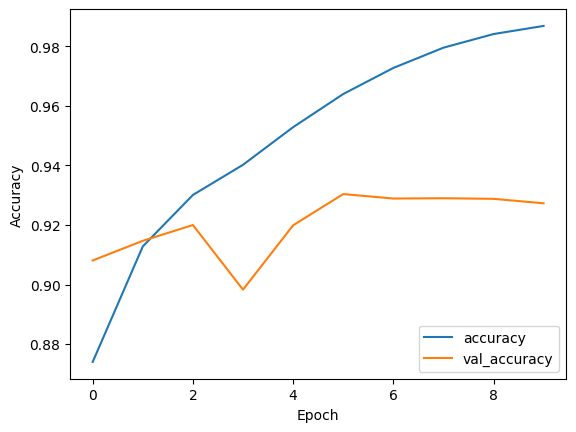

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.95, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)